## Importing the dependencies.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import spacy
from gensim import corpora, models
import pandas as pd

%matplotlib inline

In [2]:
# Loading the data.
df=pd.read_csv('climate_nasa.csv')
df.head()

,date,likesCount,profileName,commentsCount,text
0,2022-09-07T17:12:32.000Z,2,4dca617d86b3fdce80ba7e81fb16e048c9cd9798cdfd6d...,NaN,Neat comparison I have not heard it before.\n ...
1,2022-09-08T14:51:13.000Z,0,518ab97f2d115ba5b6f03b2fba2ef2b120540c9681288b...,NaN,An excellent way to visualise the invisible! T...
2,2022-09-07T17:19:41.000Z,1,d82e8e24eb633fd625b0aef9b3cb625cfb044ceb8483e1...,3.0,Does the CO2/ghg in the troposphere affect the...
3,2022-09-08T00:51:30.000Z,4,37a509fa0b5177a2233c7e2d0e2b2d6916695fa9fba3f2...,NaN,excellent post! I defo feel the difference - o...
4,2022-09-07T19:06:20.000Z,16,e54fbbd42a729af9d04d9a5cc1f9bbfe8081a31c219ecb...,26.0,"Yes, and carbon dioxide does not harm the Eart..."


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522 entries, 0 to 521
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           522 non-null    object 
 1   likesCount     522 non-null    int64  
 2   profileName    522 non-null    object 
 3   commentsCount  244 non-null    float64
 4   text           504 non-null    object 
dtypes: float64(1), int64(1), object(3)
memory usage: 20.5+ KB


In [4]:
df.shape

(522, 5)

In [5]:
df.isnull().sum()

date               0
likesCount         0
profileName        0
commentsCount    278
text              18
dtype: int64

## Preprocessing

In [6]:
# Filling the null values of commentsCount with 0.
df['commentsCount']=df['commentsCount'].fillna(0)

In [7]:
# Dropping the NAN values and duplicates.
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

In [8]:
df.isnull().sum()

date             0
likesCount       0
profileName      0
commentsCount    0
text             0
dtype: int64

In [9]:
df.shape

(504, 5)

In [10]:
# converting date to datetime format.
df['date']=pd.to_datetime(df['date'],errors='coerce')

In [11]:
# Converting the datatype.
df['commentsCount']=df['commentsCount'].astype(int)

In [12]:
# Function to clean the text.
def clean_text(text):
    text = str(text).lower()                             # Lowercase
    text = re.sub(r"http\S+", "", text)                  # Remove URLs
    text = re.sub(r"[^\w\s]", "", text)                  # Remove punctuation
    text = re.sub(r"\d+", "", text)                      # Remove numbers
    text = re.sub(r"\s+", " ", text).strip()             # Remove extra spaces
    return text

df['clean_text'] = df['text'].apply(clean_text)

In [13]:
# Count number of words in each cleaned text and store in a new column.
df['word_count'] = df['clean_text'].apply(lambda x: len(x.split()))

In [14]:
df[['date', 'likesCount', 'commentsCount', 'text', 'clean_text', 'word_count']].head()

,date,likesCount,commentsCount,text,clean_text,word_count
0,2022-09-07 17:12:32+00:00,2,0,Neat comparison I have not heard it before.\n ...,neat comparison i have not heard it before i w...,32
1,2022-09-08 14:51:13+00:00,0,0,An excellent way to visualise the invisible! T...,an excellent way to visualise the invisible th...,8
2,2022-09-07 17:19:41+00:00,1,3,Does the CO2/ghg in the troposphere affect the...,does the coghg in the troposphere affect the s...,16
3,2022-09-08 00:51:30+00:00,4,0,excellent post! I defo feel the difference - o...,excellent post i defo feel the difference one ...,18
4,2022-09-07 19:06:20+00:00,16,26,"Yes, and carbon dioxide does not harm the Eart...",yes and carbon dioxide does not harm the earth...,24


## EDA

Basic Statistics:
       likesCount  commentsCount   word_count
count  504.000000     504.000000   504.000000
mean     4.869048       4.190476    31.136905
std     12.239115       9.571715    85.071757
min      0.000000       0.000000     0.000000
25%      0.000000       0.000000     7.000000
50%      1.000000       0.000000    16.000000
75%      4.000000       4.250000    31.250000
max    126.000000      93.000000  1220.000000


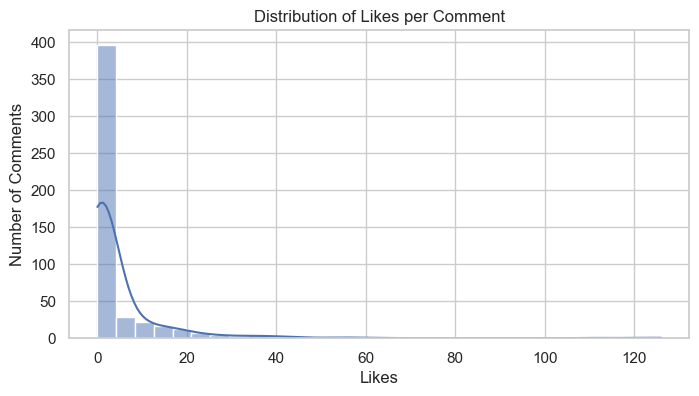

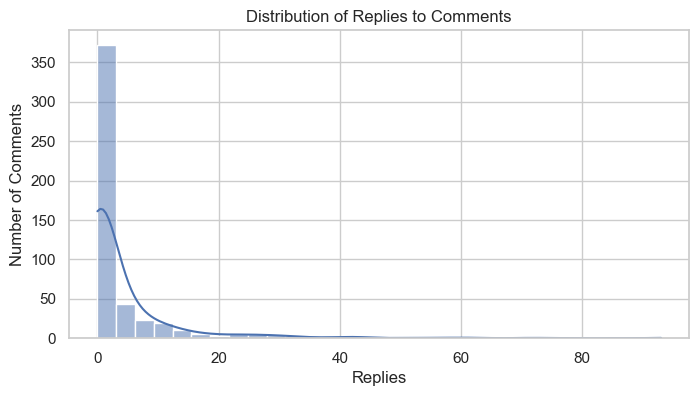

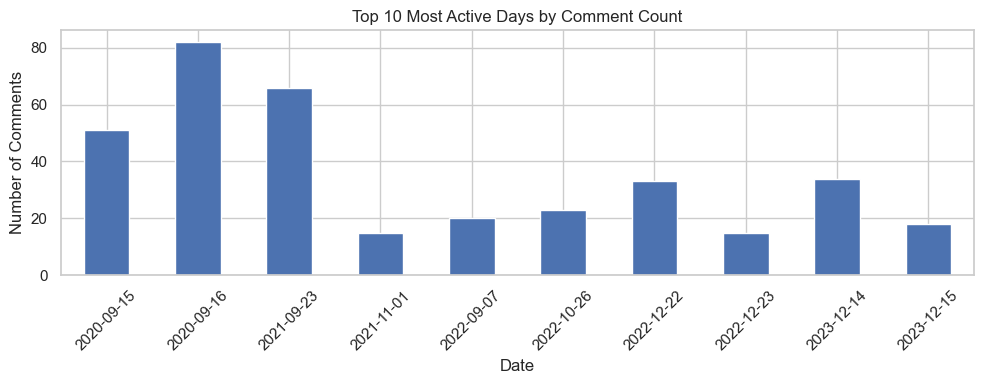

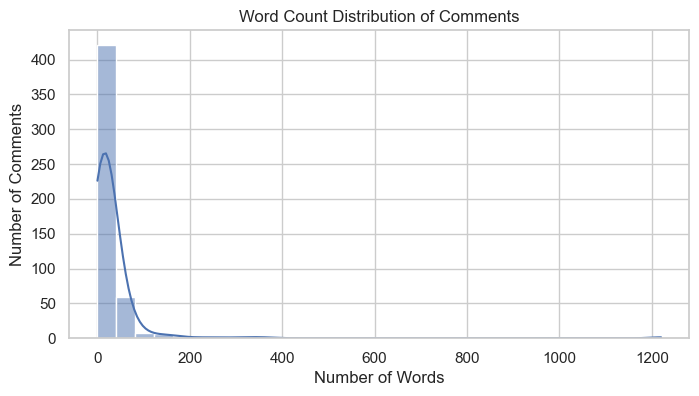

In [15]:
# Set Seaborn style
sns.set(style="whitegrid")

# 1. Basic Statistics
print("Basic Statistics:")
print(df[['likesCount', 'commentsCount', 'word_count']].describe())

# 2. Distribution of Likes
plt.figure(figsize=(8, 4))
sns.histplot(df['likesCount'], bins=30, kde=True)
plt.title('Distribution of Likes per Comment')
plt.xlabel('Likes')
plt.ylabel('Number of Comments')
plt.show()

# 3. Distribution of Comment Replies
plt.figure(figsize=(8, 4))
sns.histplot(df['commentsCount'], bins=30, kde=True)
plt.title('Distribution of Replies to Comments')
plt.xlabel('Replies')
plt.ylabel('Number of Comments')
plt.show()

# 4. Most Active Days (Top 10)
top_days = df['date'].dt.date.value_counts().head(10).sort_index()
plt.figure(figsize=(10, 4))
top_days.plot(kind='bar')
plt.title('Top 10 Most Active Days by Comment Count')
plt.xlabel('Date')
plt.ylabel('Number of Comments')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 5. Word Count Distribution
plt.figure(figsize=(8, 4))
sns.histplot(df['word_count'], bins=30, kde=True)
plt.title('Word Count Distribution of Comments')
plt.xlabel('Number of Words')
plt.ylabel('Number of Comments')
plt.show()

## Sentiment Analysis

In [16]:
# Initialize VADER analyzer
analyzer = SentimentIntensityAnalyzer()

# Apply sentiment scoring
def get_sentiment_scores(text):
    return analyzer.polarity_scores(text)

# Apply to each comment
sentiment_scores = df['clean_text'].apply(get_sentiment_scores)

# Convert dict output to dataframe columns
sentiment_df = sentiment_scores.apply(pd.Series)

# Merge sentiment scores into original DataFrame
df = pd.concat([df, sentiment_df], axis=1)

# Add a sentiment label
def label_sentiment(compound):
    if compound >= 0.05:
        return 'Positive'
    elif compound <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

df['sentiment_label'] = df['compound'].apply(label_sentiment)

# Preview result
df[['clean_text', 'compound', 'sentiment_label']].head()

,clean_text,compound,sentiment_label
0,neat comparison i have not heard it before i w...,0.7702,Positive
1,an excellent way to visualise the invisible th...,0.7650,Positive
2,does the coghg in the troposphere affect the s...,0.2960,Positive
3,excellent post i defo feel the difference one ...,0.1027,Positive
4,yes and carbon dioxide does not harm the earth...,0.6059,Positive


C:\Users\Hardik Singh\AppData\Local\Temp\ipykernel_5368\2856712366.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='sentiment_label', order=['Positive', 'Neutral', 'Negative'], palette='pastel')


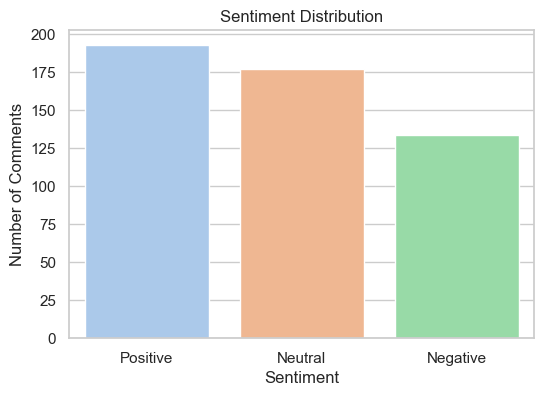

In [17]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='sentiment_label', order=['Positive', 'Neutral', 'Negative'], palette='pastel')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Number of Comments')
plt.show()

## Modelling the themes across the comments

In [18]:
# Load the English spaCy model
nlp = spacy.load("en_core_web_sm")

In [19]:
# Define a tokenizer that uses spaCy to lemmatize and filter tokens.
def spacy_tokenizer(text):
    doc = nlp(text)
    tokens = [
        token.lemma_.lower() for token in doc
        if token.is_alpha and not token.is_stop and len(token) > 2
    ]
    return tokens

# Apply to all comments
df['tokens'] = df['clean_text'].apply(spacy_tokenizer)

In [20]:
# Create a dictionary from tokens
dictionary = corpora.Dictionary(df['tokens'])

# Filter out rare and common tokens
dictionary.filter_extremes(no_below=5, no_above=0.5)

# Create bag-of-words corpus
corpus = [dictionary.doc2bow(text) for text in df['tokens']]

In [21]:
# Train LDA model
lda_model = models.LdaModel(
    corpus=corpus,
    id2word=dictionary,
    num_topics=5,
    random_state=42,
    passes=10,
    alpha='auto',
    per_word_topics=True
)

# Print the topics
topics = lda_model.print_topics(num_words=5)
for idx, topic in topics:
    print(f"Topic #{idx + 1}: {topic}")

Topic #1: 0.054*"global" + 0.040*"warming" + 0.030*"change" + 0.030*"ice" + 0.028*"climate"
Topic #2: 0.045*"carbon" + 0.037*"water" + 0.035*"atmosphere" + 0.035*"level" + 0.035*"rise"
Topic #3: 0.071*"year" + 0.026*"energy" + 0.024*"start" + 0.023*"gas" + 0.022*"cause"
Topic #4: 0.038*"people" + 0.035*"earth" + 0.031*"go" + 0.029*"temperature" + 0.020*"planet"
Topic #5: 0.094*"change" + 0.093*"climate" + 0.038*"nasa" + 0.022*"earth" + 0.022*"scientist"


In [22]:
def display_compact_terms_table(lda_model, num_topics=5, top_n=5):
    print("🧠 Top terms per topic:\n")
    for topic_id in range(num_topics):
        print(f"\n📌 Topic {topic_id + 1}:")
        topic_terms = lda_model.show_topic(topic_id, topn=top_n)
        df = pd.DataFrame(topic_terms, columns=["Term", "Weight"])
        print(df.to_string(index=False))

# Display top 5 terms for each of 5 topics
display_compact_terms_table(lda_model, num_topics=5, top_n=5)

🧠 Top terms per topic:


📌 Topic 1:
   Term   Weight
 global 0.053501
warming 0.040057
 change 0.030326
    ice 0.030019
climate 0.027551

📌 Topic 2:
      Term   Weight
    carbon 0.044803
     water 0.036885
atmosphere 0.035367
     level 0.034847
      rise 0.034634

📌 Topic 3:
  Term   Weight
  year 0.070754
energy 0.025691
 start 0.024095
   gas 0.023081
 cause 0.021722

📌 Topic 4:
       Term   Weight
     people 0.037732
      earth 0.034502
         go 0.031171
temperature 0.029417
     planet 0.020495

📌 Topic 5:
     Term   Weight
   change 0.094175
  climate 0.092923
     nasa 0.037781
    earth 0.022237
scientist 0.021611


In [23]:
def get_dominant_topic(lda_model, bow):
    topics = lda_model.get_document_topics(bow)
    if topics:
        return max(topics, key=lambda x: x[1])[0]  # Topic ID with highest weight
    else:
        return None

# Assign topic to each document
df['dominant_topic'] = [get_dominant_topic(lda_model, bow) for bow in corpus]

In [24]:
# Convert Date column to datetime
df['date'] = pd.to_datetime(df['date'])

# Create year-month column
df['year_month'] = df['date'].dt.to_period('M')

C:\Users\Hardik Singh\AppData\Local\Temp\ipykernel_5368\1498329919.py:5: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['year_month'] = df['date'].dt.to_period('M')


In [25]:
# Count number of comments per topic per month
topic_trend = df.groupby(['year_month', 'dominant_topic']).size().unstack(fill_value=0)

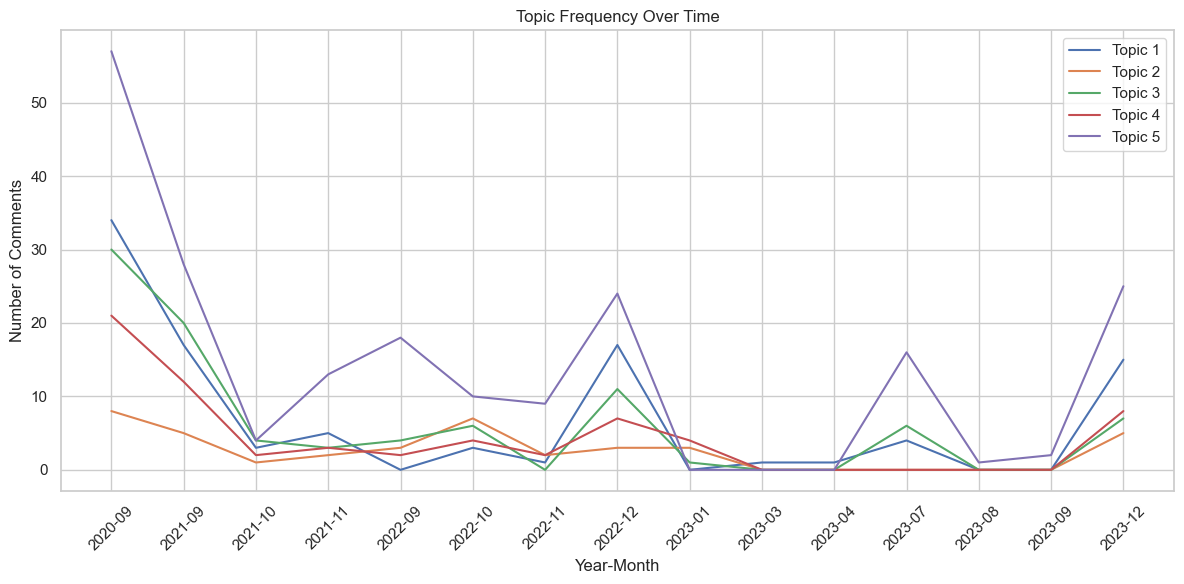

In [26]:
# Convert Period to string for plotting
topic_trend.index = topic_trend.index.astype(str)

# Plot
plt.figure(figsize=(12, 6))
for col in topic_trend.columns:
    plt.plot(topic_trend.index, topic_trend[col], label=f'Topic {col + 1}')

plt.title('Topic Frequency Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Number of Comments')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()